# Power Plant Dataset Analysis
This notebook walks through the analysis of a global power plant dataset.

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

# Load the dataset
file_path = 'global_power_plant_database.csv'
data = pd.read_csv(file_path)

# Display the first few rows of the dataset
data.head()

/var/folders/w2/k9qh9hh53491xp_d927z9f000000gn/T/ipykernel_17299/1863897619.py:9: DtypeWarning: Columns (10) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv(file_path)


,country,country_long,name,gppd_idnr,capacity_mw,latitude,longitude,primary_fuel,other_fuel1,other_fuel2,...,estimated_generation_gwh_2013,estimated_generation_gwh_2014,estimated_generation_gwh_2015,estimated_generation_gwh_2016,estimated_generation_gwh_2017,estimated_generation_note_2013,estimated_generation_note_2014,estimated_generation_note_2015,estimated_generation_note_2016,estimated_generation_note_2017
0,AFG,Afghanistan,Kajaki Hydroelectric Power Plant Afghanistan,GEODB0040538,33.0,32.322,65.1190,Hydro,NaN,NaN,...,123.77,162.90,97.39,137.76,119.50,HYDRO-V1,HYDRO-V1,HYDRO-V1,HYDRO-V1,HYDRO-V1
1,AFG,Afghanistan,Kandahar DOG,WKS0070144,10.0,31.670,65.7950,Solar,NaN,NaN,...,18.43,17.48,18.25,17.70,18.29,SOLAR-V1-NO-AGE,SOLAR-V1-NO-AGE,SOLAR-V1-NO-AGE,SOLAR-V1-NO-AGE,SOLAR-V1-NO-AGE
2,AFG,Afghanistan,Kandahar JOL,WKS0071196,10.0,31.623,65.7920,Solar,NaN,NaN,...,18.64,17.58,19.10,17.62,18.72,SOLAR-V1-NO-AGE,SOLAR-V1-NO-AGE,SOLAR-V1-NO-AGE,SOLAR-V1-NO-AGE,SOLAR-V1-NO-AGE
3,AFG,Afghanistan,Mahipar Hydroelectric Power Plant Afghanistan,GEODB0040541,66.0,34.556,69.4787,Hydro,NaN,NaN,...,225.06,203.55,146.90,230.18,174.91,HYDRO-V1,HYDRO-V1,HYDRO-V1,HYDRO-V1,HYDRO-V1
4,AFG,Afghanistan,Naghlu Dam Hydroelectric Power Plant Afghanistan,GEODB0040534,100.0,34.641,69.7170,Hydro,NaN,NaN,...,406.16,357.22,270.99,395.38,350.80,HYDRO-V1,HYDRO-V1,HYDRO-V1,HYDRO-V1,HYDRO-V1


## Data Cleaning

In [4]:
# Identify missing values
missing_values = data.isnull().sum()
missing_values[missing_values > 0]

other_fuel1                      32992
other_fuel2                      34660
other_fuel3                      34844
commissioning_year               17489
owner                            14068
source                              15
url                                 18
geolocation_source                 419
wepp_id                          18702
year_of_capacity_data            20049
generation_gwh_2013              28519
generation_gwh_2014              27710
generation_gwh_2015              26733
generation_gwh_2016              25792
generation_gwh_2017              25436
generation_gwh_2018              25299
generation_gwh_2019              25277
generation_data_source           23536
estimated_generation_gwh_2013    18816
estimated_generation_gwh_2014    18433
estimated_generation_gwh_2015    17886
estimated_generation_gwh_2016    17366
estimated_generation_gwh_2017     1798
dtype: int64

In [5]:
# Drop columns with a high percentage of missing values
columns_to_drop = ['other_fuel1', 'other_fuel2', 'other_fuel3']
data = data.drop(columns=columns_to_drop)

# Fill missing values in 'commissioning_year' with the median year
data['commissioning_year'] = data['commissioning_year'].fillna(data['commissioning_year'].median())

# Ensure numerical columns are properly formatted
numeric_columns = ['capacity_mw', 'latitude', 'longitude']
data[numeric_columns] = data[numeric_columns].apply(pd.to_numeric)

## Exploratory Data Analysis

In [6]:
# Summary statistics for numerical columns
data.describe()

,capacity_mw,latitude,longitude,commissioning_year,year_of_capacity_data,generation_gwh_2013,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018,generation_gwh_2019,estimated_generation_gwh_2013,estimated_generation_gwh_2014,estimated_generation_gwh_2015,estimated_generation_gwh_2016,estimated_generation_gwh_2017
count,34936.000000,34936.000000,34936.000000,34936.000000,14887.000000,6417.000000,7226.000000,8203.000000,9144.000000,9500.000000,9637.000000,9659.000000,16120.000000,16503.000000,17050.000000,17570.000000,33138.000000
mean,163.355148,32.816637,-6.972803,2002.213173,2018.218849,592.696107,656.863891,762.368840,693.149763,661.834161,517.320785,423.922436,239.112221,242.431122,235.866067,235.695265,716.443378
std,489.636072,22.638603,78.405850,17.215166,1.606428,2174.833482,2231.464288,2533.459828,2404.516759,2369.296957,1975.302686,1698.506485,1191.258172,1285.798297,1267.005223,1259.559841,2484.361200
min,1.000000,-77.847000,-179.977700,1896.000000,2000.000000,-947.600000,-989.619000,-864.428000,-768.620000,-934.944000,-982.622000,-780.339000,1.120000,0.870000,0.440000,0.300000,0.000000
25%,4.900000,29.256475,-77.641550,2007.000000,2017.000000,1.947000,2.260000,2.664500,2.729000,2.467000,2.242000,2.751500,8.620000,8.680000,8.380000,8.322500,8.180000
50%,16.745000,39.727750,-2.127100,2007.000000,2019.000000,23.426000,23.608500,26.142000,22.462389,17.876500,12.530000,11.530000,27.620000,28.250000,26.830000,27.555000,37.590000
75%,75.344250,46.263125,49.502675,2007.000000,2019.000000,199.706000,226.322250,285.862583,249.866750,214.505150,151.117000,122.781498,106.805000,106.980000,103.120000,107.237500,229.565000
max,22500.000000,71.292000,179.388700,2020.000000,2019.000000,50834.000000,32320.917000,37433.607000,32377.477000,36448.643000,35136.000000,31920.368000,48675.060000,58470.770000,57113.350000,60859.730000,82810.770000


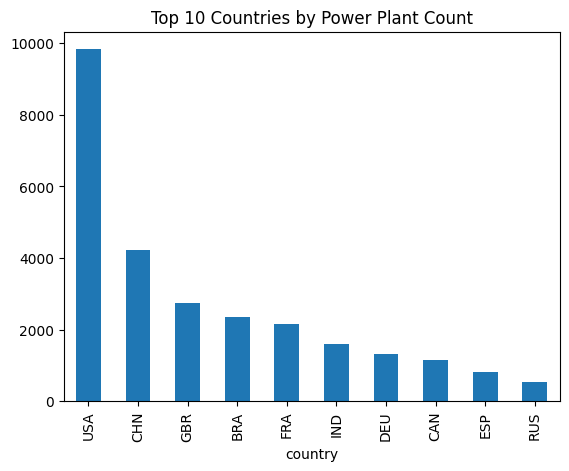

In [7]:
# Distribution of power plants by country
country_distribution = data['country'].value_counts()
country_distribution.head(10).plot(kind='bar', title='Top 10 Countries by Power Plant Count')
plt.show()

## Statistical Analysis

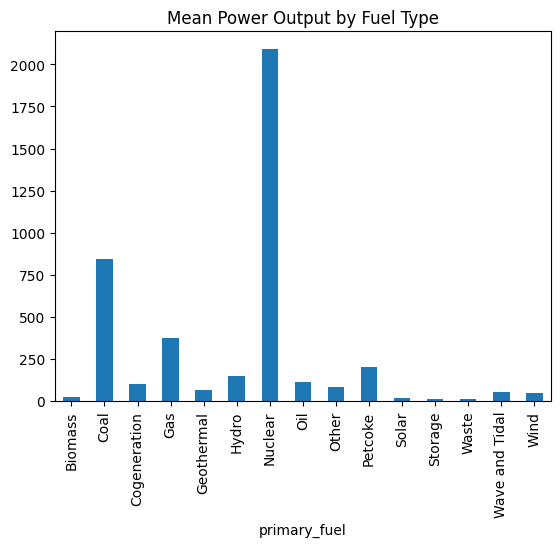

In [8]:
# Mean power output by fuel type
mean_output = data.groupby('primary_fuel')['capacity_mw'].mean()
mean_output.plot(kind='bar', title='Mean Power Output by Fuel Type')
plt.show()

## Time Series Analysis

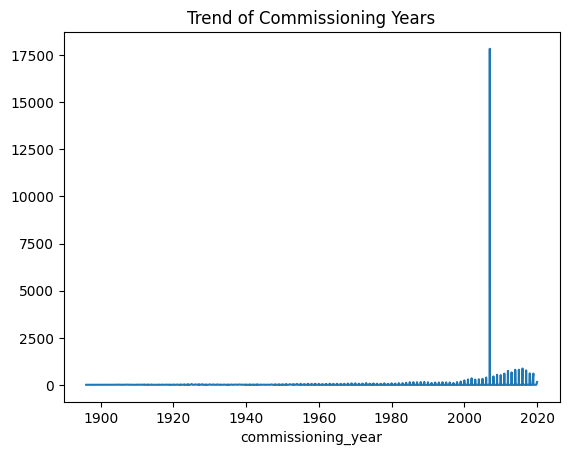

In [9]:
# Trend of commissioning years
commissioning_trend = data['commissioning_year'].value_counts().sort_index()
commissioning_trend.plot(kind='line', title='Trend of Commissioning Years')
plt.show()

## Geographical Visualization

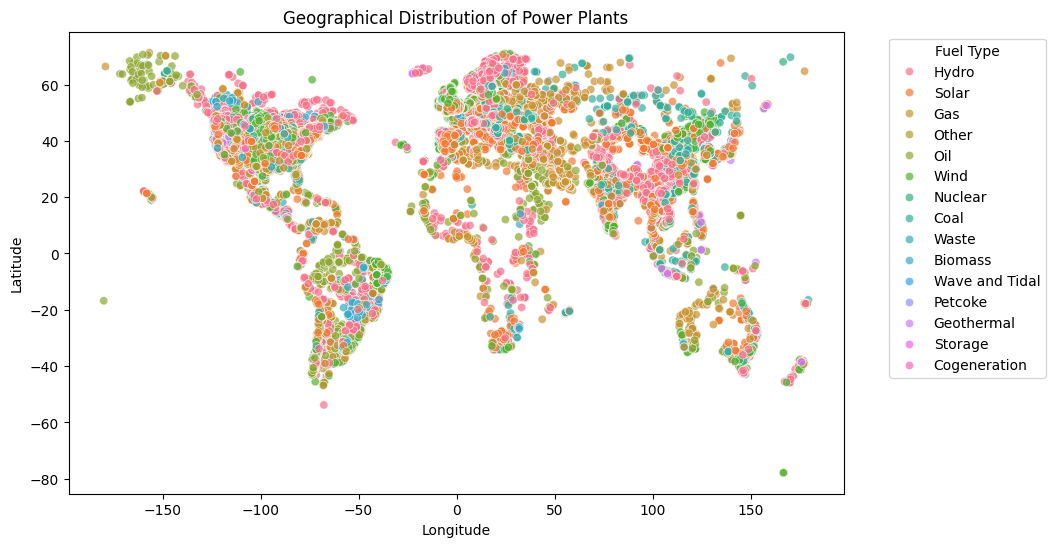

In [10]:
# Scatter plot of power plants by latitude and longitude
plt.figure(figsize=(10, 6))
sns.scatterplot(x=data['longitude'], y=data['latitude'], hue=data['primary_fuel'], alpha=0.7)
plt.title('Geographical Distribution of Power Plants')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.legend(title='Fuel Type', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()